In [3]:
# %load first_cell.py
%reload_ext autoreload
%autoreload 2
from pathlib import Path
home = str(Path.home())

import sys
sys.path = sys.path + [f'{home}/.conda/envs/norm_env/lib/python37.zip', 
                       f'{home}/.conda/envs/norm_env/lib/python3.7', 
                       f'{home}/.conda/envs/norm_env/lib/python3.7/lib-dynload', 
                       f'{home}/.conda/envs/norm_env/lib/python3.7/site-packages',
                      '../src']
sys.prefix = '/home/joaom/.conda/envs/norm_env'

from paths import RAW_PATH, TREAT_PATH, OUTPUT_PATH, FIGURES_PATH

from copy import deepcopy
import numpy as np
import pandas as pd
pd.options.display.max_columns = 999
import yaml
import matplotlib.pyplot as plt 
import datetime

import warnings
warnings.filterwarnings('ignore')

# Plotting
import plotly
import plotly.graph_objs as go
import cufflinks as cf
plotly.offline.init_notebook_mode(connected=True)

def iplottitle(title, width=40):
    return '<br>'.join(textwrap.wrap(title, width))

# Setting cufflinks
import textwrap
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import yaml
from jinja2 import Template
cf.themes.THEMES['custom'] = yaml.load(open('cufflinks_template.yaml', 'r'))

In [107]:
import pickle
import networkx as nx
import pylab as plt
from networkx.drawing.nx_agraph import graphviz_layout, to_agraph

In [108]:
def replace_attribute_key(G, tnode, old_key, new_key):
    value = G.node[tnode][old_key]
    G.node[tnode].pop(old_key, None)
    G.node[tnode][new_key] = value 
G = pickle.load(open(OUTPUT_PATH / 'dependency_graph.p', 'rb'))
attr = G.node.data()._nodes
for k in attr.keys():
    replace_attribute_key(G, k, 'name', '_name')
nx.nx_pydot.write_dot(G, open(OUTPUT_PATH / 'dependency.dot', 'w'))

In [166]:
from rdp import rdp

In [4]:
import geojson
from shapely.geometry import shape
import pandas as pd
from pathlib import Path


def convert(path):
    converted = []
    for p in Path(path).glob('*.GeoJson'):
        d = geojson.load(open(p, 'r'))
        converted.append(dict(
            country_name=d['properties']['name'],
            country_iso=d['properties']['alltags']['ISO3166-1'],
            region_slug='_'.join(['country'] + d['properties']['name'].lower().split(' ')),
            region_name=d['properties']['name'],
            region_type='country',
            dashboard='TRUE',
            population=d['properties']['alltags'].get('population'),
            timezone=d['properties']['alltags'].get('timezone'),
            region_shapefile_wkt_1=None,
            region_shapefile_wkt=shape(d['geometry']).simplify(0.05, preserve_topology=False).wkt
        ))
    pd.DataFrame(converted)[['country_name',
                        'country_iso',
                        'region_slug',
                        'region_name',
                        'region_type',
                        'dashboard',
                        'population',
                        'timezone',
                        'region_shapefile_wkt_1',
                        'region_shapefile_wkt']].to_csv(path / 'converted.csv', index=False)

In [5]:
a = convert(RAW_PATH / 'countries-boundaries')

In [178]:
converted

In [171]:
rdp(d['geometry']['coordinates'][0])

[[[-72.057471, 19.953058],
  [-72.031356, 19.924588],
  [-71.913843, 19.796456],
  [-71.803818, 19.733179],
  [-71.795873, 19.731963],
  [-71.773662, 19.731261],
  [-71.758677, 19.701945],
  [-71.758424, 19.701645],
  [-71.758254, 19.699993],
  [-71.758503, 19.699174],
  [-71.759217, 19.698996],
  [-71.759633, 19.69895],
  [-71.75995, 19.698746],
  [-71.76032, 19.698451],
  [-71.760503, 19.697751],
  [-71.760048, 19.697069],
  [-71.760016, 19.696865],
  [-71.760073, 19.696567],
  [-71.76037, 19.696301],
  [-71.760828, 19.695893],
  [-71.761624, 19.695247],
  [-71.761963, 19.693844],
  [-71.761878, 19.693392],
  [-71.761635, 19.693116],
  [-71.761257, 19.693243],
  [-71.760795, 19.693797],
  [-71.760269, 19.694747],
  [-71.759833, 19.695022],
  [-71.759338, 19.694902],
  [-71.75911, 19.694754],
  [-71.758874, 19.694607],
  [-71.758856, 19.694444],
  [-71.758884, 19.694207],
  [-71.759263, 19.693731],
  [-71.759332, 19.69353],
  [-71.75929, 19.69335],
  [-71.759211, 19.693135],
  [-71.75

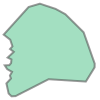

In [175]:
shape(d['geometry']).simplify(0.05, preserve_topology=False)